In [0]:
#install depenencies
!pip install kaggle

In [0]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddharthnaik7","key":"28e0f6c07a924550d841c251e1730ac7"}'}

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#import the dataset we want to use for our project
!kaggle competitions download -c aptos2019-blindness-detection

100% 7.99G/8.01G [00:52<00:00, 112MB/s]
100% 8.01G/8.01G [00:53<00:00, 162MB/s]
100% 1.50G/1.50G [00:11<00:00, 159MB/s]
100% 1.50G/1.50G [00:11<00:00, 140MB/s]
  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 56.5MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 22.2MB/s]
  0% 0.00/28.3k [00:00<?, ?B/s]
100% 28.3k/28.3k [00:00<00:00, 25.3MB/s]


In [0]:
#lets see the imported files from kaggle competetion
!ls

kaggle.json  sample_submission.csv  test_images.zip  train_images.zip
sample_data  test.csv		    train.csv


# **Colab Utilization Specifications**

In [0]:
#Disk Information of Colab
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   40G  301G  12% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
/dev/sda1       365G   42G  324G  12% /opt/bin
tmpfs           6.4G   12K  6.4G   1% /var/colab
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
#CPU Specs
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: G

In [0]:
#Memory Specs
!cat /proc/meminfo

MemTotal:       13335276 kB
MemFree:          149140 kB
MemAvailable:   12598856 kB
Buffers:           73624 kB
Cached:         12226752 kB
SwapCached:            0 kB
Active:           560580 kB
Inactive:       12017788 kB
Active(anon):     257148 kB
Inactive(anon):      360 kB
Active(file):     303432 kB
Inactive(file): 12017428 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               960 kB
Writeback:             0 kB
AnonPages:        277984 kB
Mapped:           184732 kB
Shmem:               908 kB
Slab:             486648 kB
SReclaimable:     454720 kB
SUnreclaim:        31928 kB
KernelStack:        3776 kB
PageTables:         4736 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667636 kB
Committed_AS:    1709652 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

# **The VM used for Colaboratory**


> **RAM:** 13 GB


> **CPU:** 2 vCPU (when checking using psutil - so a n1-highmem-2 instance)



> **CPU Type:** 2-core Xeon 2.2GHz


> **Maximum Lifetime of a VM:** 12 Hours


> **Idle VMs Time Out:** After 90 mins




In [0]:
from psutil import *
print(cpu_count())
print(cpu_stats())
print(virtual_memory())

2
scpustats(ctx_switches=695840, interrupts=788358, soft_interrupts=1167013, syscalls=0)
svmem(total=13655322624, available=12902232064, percent=5.5, used=440332288, free=152752128, active=573259776, inactive=12307185664, buffers=75431936, cached=12986806272, shared=929792, slab=498257920)


# **Start**

# **Unzip Data**

In [0]:
!unzip train_images.zip -d ./Train_Images

Archive:  train_images.zip
  inflating: ./Train_Images/7b9d519cbd66.png  
  inflating: ./Train_Images/ae49cc60f251.png  
  inflating: ./Train_Images/b294927b14b0.png  
  inflating: ./Train_Images/f4d3777f2710.png  
  inflating: ./Train_Images/d74ccc796517.png  
  inflating: ./Train_Images/15bed5adde74.png  
  inflating: ./Train_Images/f002ce614c59.png  
  inflating: ./Train_Images/7335a2d43ada.png  
  inflating: ./Train_Images/9b7b6e4db1d5.png  
  inflating: ./Train_Images/1968183f0e61.png  
  inflating: ./Train_Images/d91273efb92a.png  
  inflating: ./Train_Images/5cf9127f251a.png  
  inflating: ./Train_Images/370f575adb23.png  
  inflating: ./Train_Images/4c17e85686f0.png  
  inflating: ./Train_Images/4f7755e74a9e.png  
  inflating: ./Train_Images/25e9fd872182.png  
  inflating: ./Train_Images/b64e1eef3d63.png  
  inflating: ./Train_Images/e7d2c2c3b30f.png  
  inflating: ./Train_Images/bfda2fd0533a.png  
  inflating: ./Train_Images/224bb938e2dd.png  
  inflating: ./Train_Images/d51e5

In [0]:
!unzip test_images.zip -d ./Test_Images

Archive:  test_images.zip
  inflating: ./Test_Images/270a532df702.png  
  inflating: ./Test_Images/86fd5df366b2.png  
  inflating: ./Test_Images/72dd7ca97f55.png  
  inflating: ./Test_Images/ec8f3ec97245.png  
  inflating: ./Test_Images/b3db392f5ee8.png  
  inflating: ./Test_Images/c71728f9535b.png  
  inflating: ./Test_Images/c7c003cdaaba.png  
  inflating: ./Test_Images/67b614d32bcc.png  
  inflating: ./Test_Images/e982c6b5b726.png  
  inflating: ./Test_Images/e2fdc91493f4.png  
  inflating: ./Test_Images/1d1539c0fb03.png  
  inflating: ./Test_Images/cefdb6b7fda2.png  
  inflating: ./Test_Images/f898d3e8ed90.png  
  inflating: ./Test_Images/0ccfca342907.png  
  inflating: ./Test_Images/b48785a5f763.png  
  inflating: ./Test_Images/010d915e229a.png  
  inflating: ./Test_Images/2427e06125ae.png  
  inflating: ./Test_Images/8cfa1b047c34.png  
  inflating: ./Test_Images/9295bc2a4c7a.png  
  inflating: ./Test_Images/741ef20e5e28.png  
  inflating: ./Test_Images/cd6cb8eca034.png  
  inflat

# **Delete Zip Files**

In [0]:
!rm -rf test_images.zip

In [0]:
!rm -rf train_images.zip

# **Load Training and Test Information in Dataframes**

In [0]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [0]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


# **Base Line**

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64



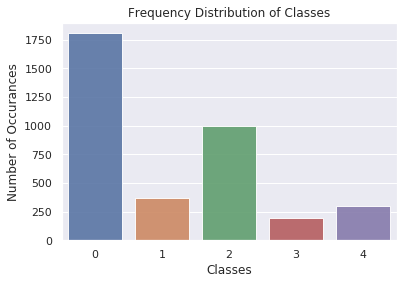

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
Class_Frequency_Count = df_train['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(Class_Frequency_Count.index,Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()

# **Directory Structure Creation**

In [0]:
#!rm -rf Validation_Dir

In [0]:
import os

train_keyword = 'Training_Dir'
validation_keyword = 'Validation_Dir'
keywords = [train_keyword,validation_keyword]
dir_list = df_train['diagnosis'].tolist()

for keyword in keywords:
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  for class_dir in dir_list:
    if(not os.path.exists(keyword+'/'+str(class_dir))):
      os.mkdir(keyword+'/'+str(class_dir))

In [0]:
split = int(0.8 * len(df_train))

train_dataframe = df_train.iloc[:split]
val_dataframe = df_train.iloc[split:]

train_images = train_dataframe['id_code'].tolist()
train_labels = train_dataframe['diagnosis'].tolist()
val_images = val_dataframe['id_code'].tolist()
val_labels = val_dataframe['diagnosis'].tolist()

In [0]:
import shutil as cf
image_list = []
class_list = []
for keyword in keywords:
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  if keyword == train_keyword:
    image_list = train_images
    class_list = train_labels
  elif keyword == validation_keyword: 
    image_list = val_images
    class_list = val_labels
  for image_info in image_list:
    cl = class_list[image_list.index(image_info)]
    cf.copy('Train_Images/'+str(image_info)+'.png', keyword+'/'+str(cl))

In [0]:
!rm -rf Train_Images

# **Fine Tuning Model**

In [0]:
from keras.applications import VGG16
 

vgg_conv = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

Using TensorFlow backend.
W0714 23:14:38.759129 139963654322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 23:14:38.795075 139963654322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 23:14:38.808318 139963654322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 23:14:38.850255 139963654322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 1s 0us/step


W0714 23:14:40.391715 139963654322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0714 23:14:40.392945 139963654322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
# Freeze the layers except the last 2 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f4ba3dbf278> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f68fe80> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f68ed68> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4b7f6b3da0> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f6b3e10> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f663748> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4b7f6069b0> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f606e10> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f6265f8> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f5c3630> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4b7f5ddb38> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f576198> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f58e710> False
<keras.layers.convolutional.Conv2D object at 0x7f4b7f5a4a58> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4b7f53e9b0>

In [0]:
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

train_dir = 'Training_Dir'
validation_dir = 'Validation_Dir'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 60
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

1.14.0
Found 2929 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


In [0]:
# Create the model
model = keras.models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new custom layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5, activation= tf.nn.softmax))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

W0714 23:15:14.622193 139963654322048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

In [0]:
# Regular Model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-4),
              metrics=['acc'])

W0714 23:15:20.398178 139963654322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

W0714 23:15:29.924794 139963654322048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
30/29 [==============================] - 425s 14s/step - loss: 1.3575 - acc: 0.4963 - val_loss: 0.9633 - val_acc: 0.6794
Epoch 2/10
30/29 [==============================] - 392s 13s/step - loss: 0.9499 - acc: 0.6662 - val_loss: 0.8563 - val_acc: 0.7244
Epoch 3/10
30/29 [==============================] - 403s 13s/step - loss: 0.9467 - acc: 0.6756 - val_loss: 0.8990 - val_acc: 0.7203
Epoch 4/10
30/29 [==============================] - 397s 13s/step - loss: 0.8608 - acc: 0.7030 - val_loss: 0.8446 - val_acc: 0.7312
Epoch 5/10
30/29 [==============================] - 394s 13s/step - loss: 0.8326 - acc: 0.6995 - val_loss: 0.7548 - val_acc: 0.7258
Epoch 6/10
30/29 [==============================] - 395s 13s/step - loss: 0.8183 - acc: 0.7079 - val_loss: 0.8341 - val_acc: 0.7353
Epoch 7/10
30/29 [==============================] - 392s 13s/step - loss: 0.8143 - acc: 0.7150 - val_loss: 0.7469 - val_acc: 0.7394
Epoch 8/10
30/29 [==============================] - 394s 13s/step - loss: 0.

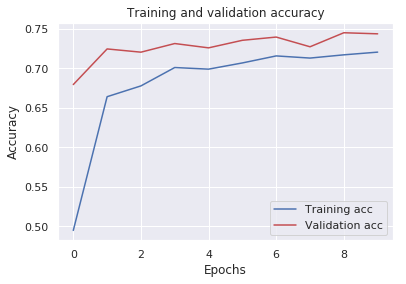

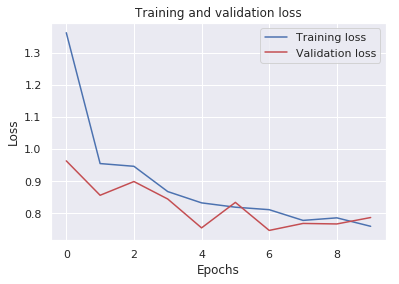

In [0]:
# Plot

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# Max Accuracy

print("Validation Accuracy:", max(history.history['val_acc']))
print("Training Accuracy", max(history.history['acc']))

Validation Accuracy: 0.7448840366440125
Training Accuracy 0.7203823853450735


In [0]:
from keras.preprocessing import image
test_list=df_test['id_code'].tolist()
test_image = []
for i in test_list:
    img = image.load_img('Test_Images/'+i+'.png',target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X = np.array(test_image)

In [0]:
pred_class = []
for class_prob in y_prob:
  class_prob = class_prob.tolist()
  pred_class.append(class_prob.index(max(class_prob)))
df_test['diagnosis'] = pred_class

# **Base Line Model**

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64



Text(0.5, 0, 'Classes')

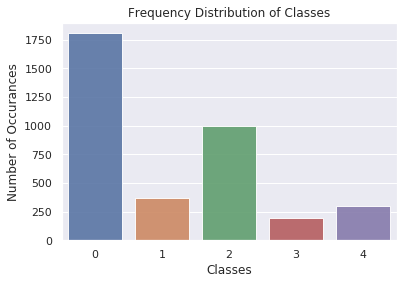

In [0]:
Class_Frequency_Count = df_train['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(Class_Frequency_Count.index,Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)

# **Predicted Model**

2    971
0    713
1    244
Name: diagnosis, dtype: int64



Text(0.5, 0, 'Classes')

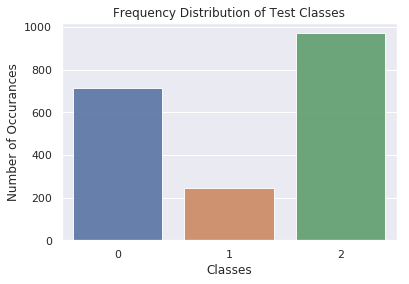

In [0]:
Class_Test_Frequency_Count = df_test['diagnosis'].value_counts()
print(str(Class_Test_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(Class_Test_Frequency_Count.index,Class_Test_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Test Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)